In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from warnings import filterwarnings
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
filterwarnings('ignore')
%matplotlib inline

In [33]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')

In [34]:
df.reset_index(inplace=True)

In [35]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [38]:
df.tail()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
239,239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
243,243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [40]:
df=df.drop(columns=['index',	'day'	,'month'	,'year'],axis=1)

In [45]:
df.head(5)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    int64  
 1    RH          244 non-null    int64  
 2    Ws          244 non-null    int64  
 3   Rain         244 non-null    float64
 4   FFMC         244 non-null    float64
 5   DMC          244 non-null    float64
 6   DC           244 non-null    object 
 7   ISI          244 non-null    float64
 8   BUI          244 non-null    float64
 9   FWI          244 non-null    object 
 10  Classes      243 non-null    object 
dtypes: float64(5), int64(3), object(3)
memory usage: 21.1+ KB


In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
ISI,244.0,4.774180,4.175318,0.0,1.400,3.50,7.300,19.0
BUI,244.0,16.664754,14.204824,1.1,6.000,12.25,22.525,68.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    int64  
 1    RH          244 non-null    int64  
 2    Ws          244 non-null    int64  
 3   Rain         244 non-null    float64
 4   FFMC         244 non-null    float64
 5   DMC          244 non-null    float64
 6   DC           244 non-null    object 
 7   ISI          244 non-null    float64
 8   BUI          244 non-null    float64
 9   FWI          244 non-null    object 
 10  Classes      243 non-null    object 
dtypes: float64(5), int64(3), object(3)
memory usage: 21.1+ KB


In [54]:
##checking null values
df.isnull().sum()

Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [55]:
##removing uncessary spaced
df.columns=df.columns.str.strip()

In [56]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes'],
      dtype='object')

In [53]:
df.dropna(inplace=True)

In [61]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
dtypes: float64(7), int64(3), object(1)
memory usage: 22.8+ KB


In [64]:

df['Classes'] = df['Classes'].str.strip().str.lower().map({'fire': 1, 'not fire': 0})

In [65]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 22.8 KB


In [68]:
len(df.columns)

11

ValueError: num must be an integer with 1 <= num <= 9, not 10

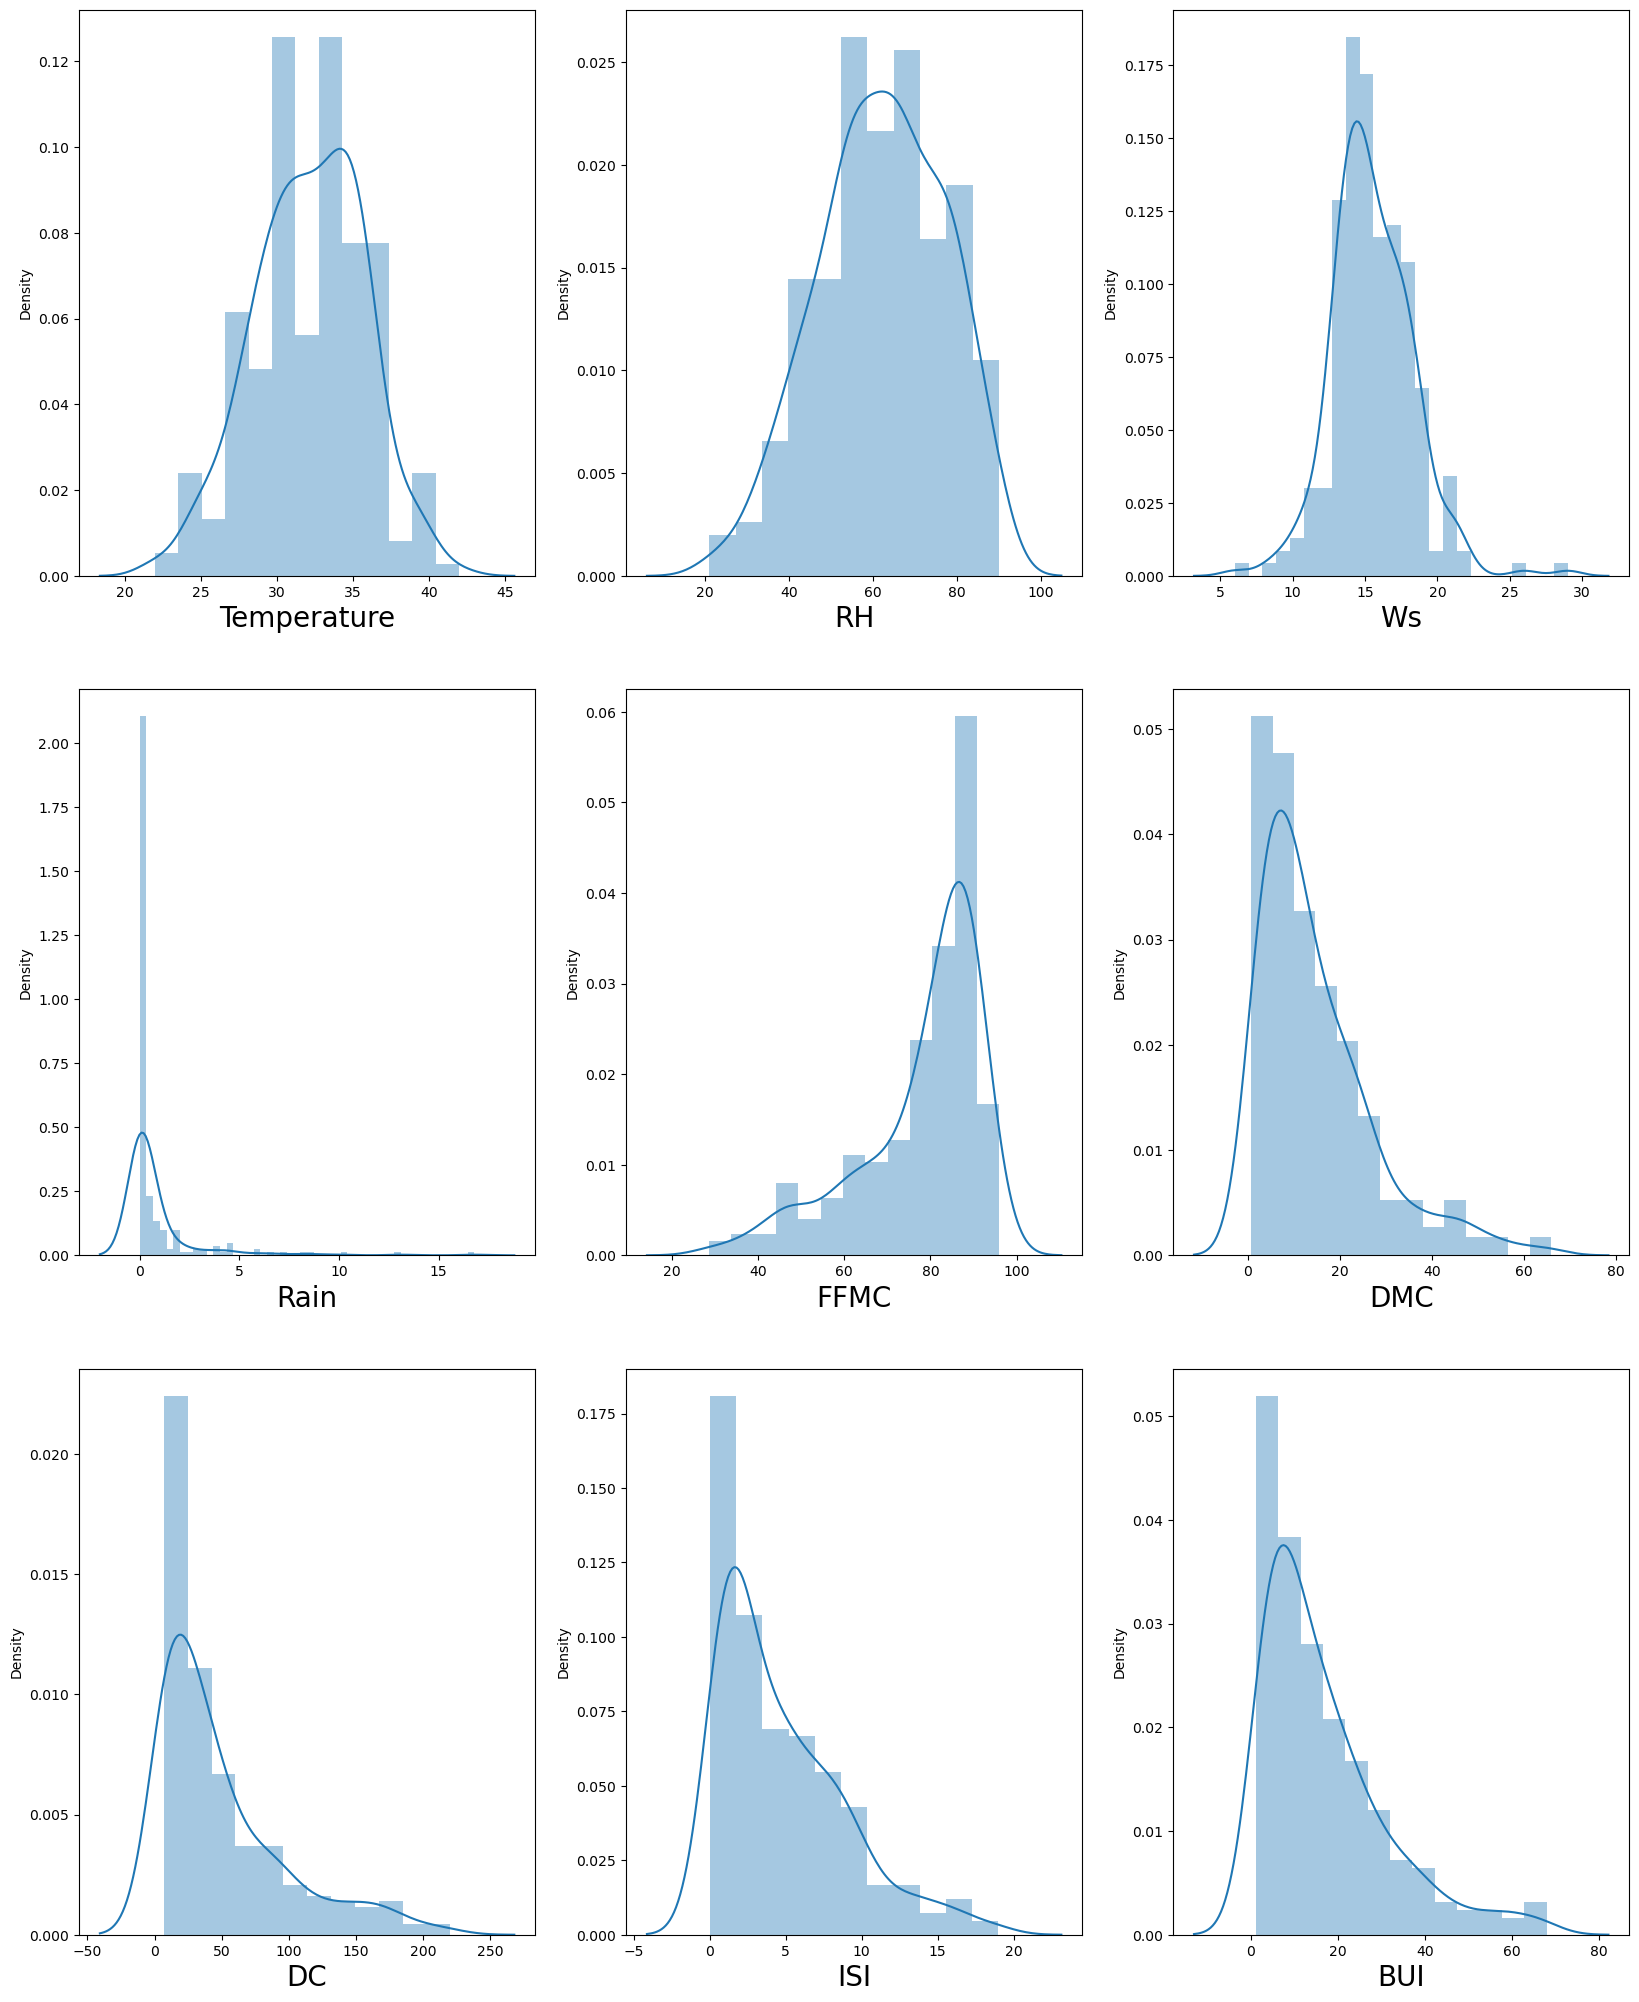

In [70]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=len(df.columns) :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [71]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216


<Axes: >

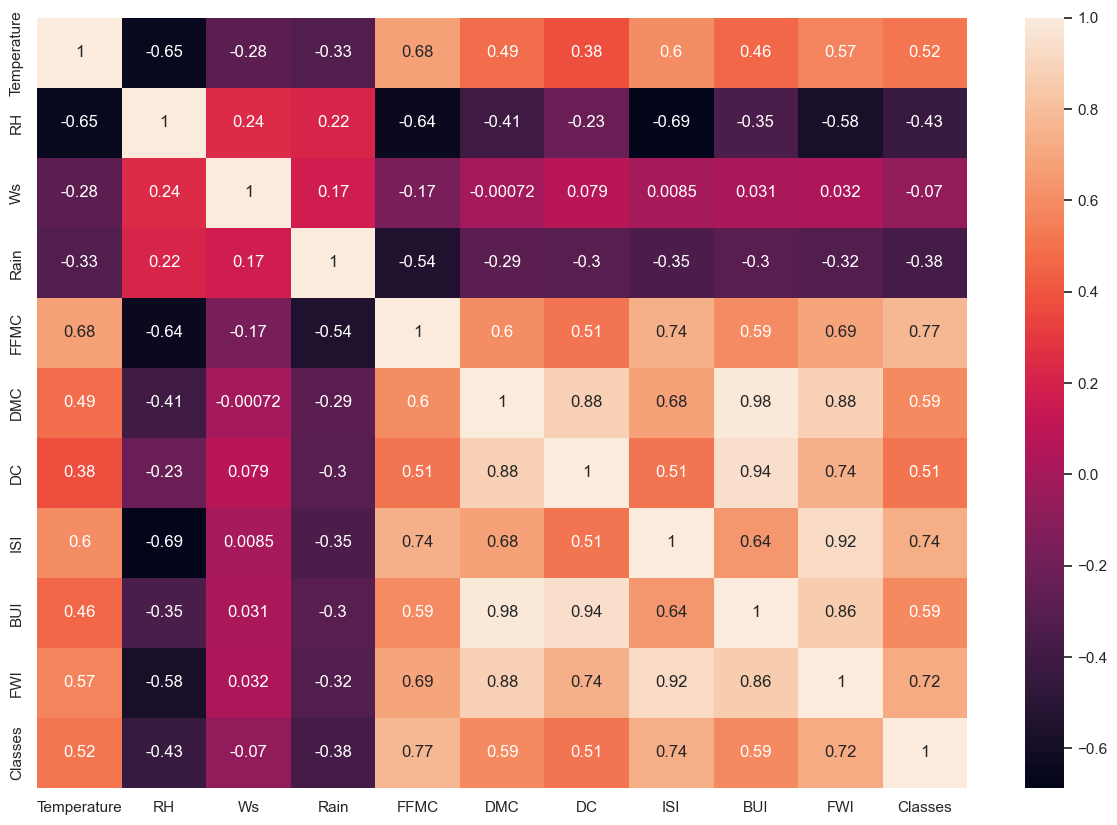

In [73]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True)

In [75]:
corr_matrix = df.corr()

# Find highly correlated features
highly_correlated_features = []
threshold = 0.9  # Adjust the threshold as desired

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            # Append the correlated feature pair
            feature_i = corr_matrix.columns[i]
            feature_j = corr_matrix.columns[j]
            correlation = corr_matrix.iloc[i, j]
            highly_correlated_features.append((feature_i, feature_j, correlation))

# Print the highly correlated features
for feature_i, feature_j, correlation in highly_correlated_features:
    print(f"{feature_i} and {feature_j} are highly correlated: {correlation}")


DMC and BUI are highly correlated: 0.9822484890812936
DC and BUI are highly correlated: 0.9419884631009655
ISI and FWI are highly correlated: 0.9228949343157855


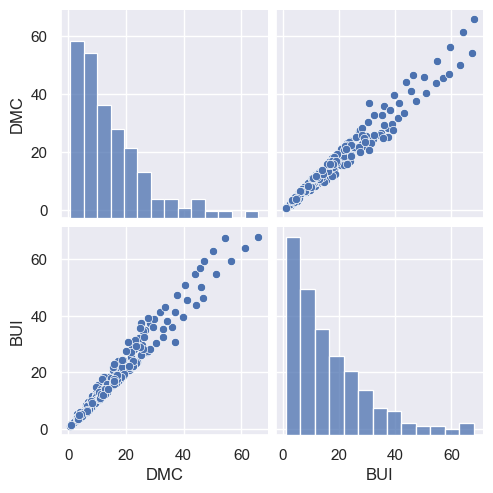

In [81]:
sns.pairplot(data=df,vars=['DMC','BUI'])

<Axes: >

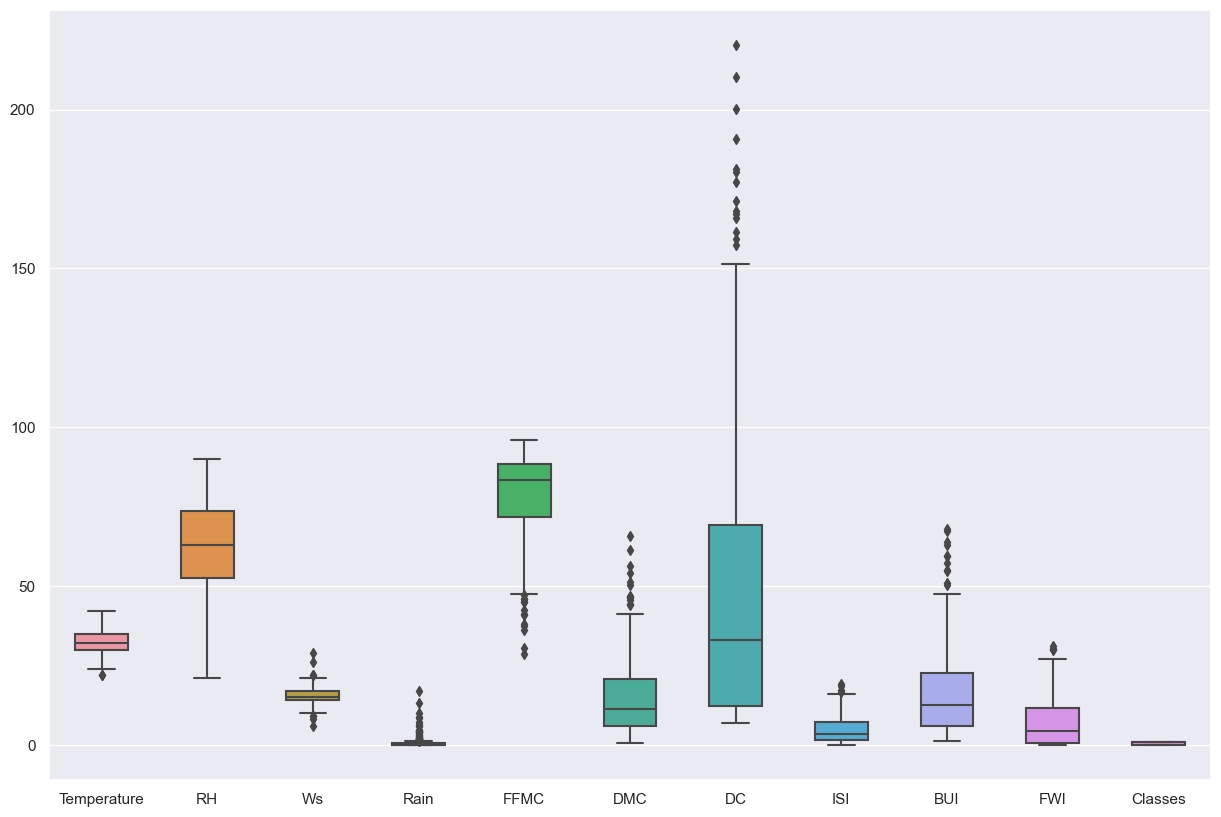

In [82]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=5)

In [90]:
##Test data and training data sepration
x=df.drop(columns='Classes',axis=1)
y=df['Classes']

In [96]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=32,test_size=.33)

In [97]:
##standartaization
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [101]:
##Applting logistic regression
Logistic_Regression=LogisticRegression()
Logistic_Regression.fit(X_train,y_train)

LogisticRegression()

In [102]:
##dataprediction on testdata
Y_predict=Logistic_Regression.predict(X_test)

In [106]:
len(Y_predict)

81

In [105]:
len(y_test)

81

In [108]:
accuracy = accuracy_score(y_test,Y_predict)
accuracy

0.9629629629629629

In [110]:
conf_mat = confusion_matrix(y_test,Y_predict)
conf_mat

array([[37,  1],
       [ 2, 41]], dtype=int64)

In [122]:
conf_mat.sum()

81

In [111]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [112]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9629629629629629

In [123]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9487179487179487

In [124]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9736842105263158

In [115]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9610389610389611

In [116]:
print("Training Score:",Logistic_Regression.score(X_train, y_train))
print("Test Score:",Logistic_Regression.score(X_test,y_test))

Training Score: 0.9814814814814815
Test Score: 0.9629629629629629


In [121]:
from sklearn.metrics import classification_report


# Print the classification report
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.98      0.95      0.96        43

    accuracy                           0.96        81
   macro avg       0.96      0.96      0.96        81
weighted avg       0.96      0.96      0.96        81

